Imported libraries and functions.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

Load and view data.

In [2]:
train = pd.read_csv('~/Desktop/Kaggle/projects/Feb_Tabular_Playground_Competition/train.csv', index_col='id') 
display(train.head())

test = pd.read_csv('~/Desktop/Kaggle/projects/Feb_Tabular_Playground_Competition/test.csv', index_col='id')
display(test.head())

Encode categorical variable.

In [3]:
for column in train.columns:
    if train[column].dtype == 'object':
        lbl = LabelEncoder()
        train[column] = lbl.fit_transform(train[column])
        test[column] = lbl.fit_transform(test[column].values)

display(train.head())
display(test.head())

Pull out `target` column from train data. And make a validation split.

In [4]:
#target value (y)
target = train.pop('target')

#validation split
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.60)

Check which model is better. The "Random Forest" has lowest MAE.

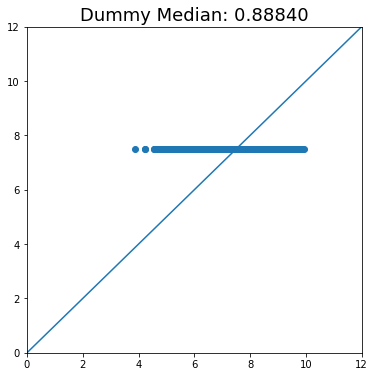

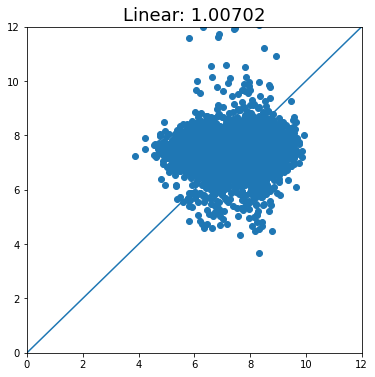

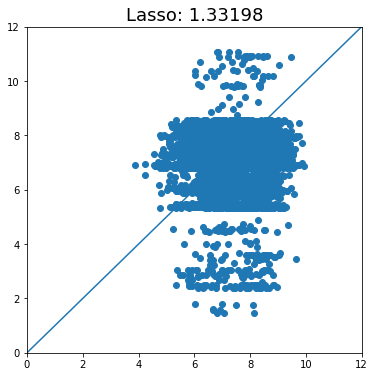

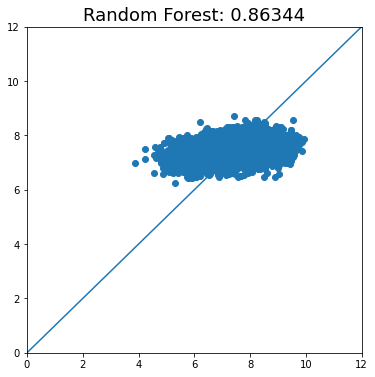

In [5]:
def plot_results(name, y, yhat, num_to_plot=10000, lims=(0,12), figsize=(6,6)):
    plt.figure(figsize=figsize)
    score = mean_squared_error(y, yhat, squared=False)
    plt.scatter(y[:num_to_plot], yhat[:num_to_plot])
    plt.plot(lims, lims)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title(f'{name}: {score:0.5f}', fontsize=18)
    plt.show()

model_names = ["Dummy Median", "Linear",  "Lasso", "Random Forest"]

models = [
    DummyRegressor(strategy='median'),
    LinearRegression(fit_intercept=False),
    Lasso(fit_intercept=False),
    RandomForestRegressor(n_estimators=50, n_jobs=-1)]

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_results(name, y_test, y_pred)

Using "Random Forest" to make the result for submission.

In [7]:
#build model
model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
model.fit(train, target)
preds = model.predict(test)

#save results
output = pd.DataFrame({'id': test.index,
'target': preds})
output.to_csv('try_1.csv', index=False)